## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [3]:
df = pd.read_csv("ufo_sightings.csv", index_col="#")
df

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Described_Duration,Description,Date_Documented,Latitude,Longitude
#,,,,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,Lackland Afb,TX,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,Chester (Uk/England),NaN,GB,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
65531,8/12/2011 23:15,Yonkers,NY,US,light,3600.0,1 hour,Blinking lights in the sky not moving then dis...,8/21/2011,40.931111,-73.899167
65532,8/12/2011 23:27,Mandeville,LA,US,sphere,60.0,1 minute,Silent orange/red illuminated jagged spherical...,8/21/2011,30.358056,-90.065556
65533,8/12/2012 00:00,Davis,CA,US,unknown,900.0,15 mins,Multi colored lights seen heading northeast ov...,8/19/2012,38.545000,-121.739444


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [4]:
non_null_df = df.dropna()
non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            53562 non-null  object 
 1   City                 53562 non-null  object 
 2   State/Province       53562 non-null  object 
 3   Country              53562 non-null  object 
 4   UFO_Shape            53562 non-null  object 
 5   Length_of_Encounter  53562 non-null  float64
 6   Described_Duration   53562 non-null  object 
 7   Description          53562 non-null  object 
 8   Date_Documented      53562 non-null  object 
 9   Latitude             53562 non-null  float64
 10  Longitude            53562 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.9+ MB


### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [5]:
del_col_df = non_null_df.drop(["Described_Duration", "Description", "Date_Documented"], axis=1)
del_col_df

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333
...,...,...,...,...,...,...,...,...
65531,8/12/2011 23:15,Yonkers,NY,US,light,3600.0,40.931111,-73.899167
65532,8/12/2011 23:27,Mandeville,LA,US,sphere,60.0,30.358056,-90.065556
65533,8/12/2012 00:00,Davis,CA,US,unknown,900.0,38.545000,-121.739444


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [6]:
del_col_df["Date_Time"] = pd.to_datetime(del_col_df["Date_Time"])
del_col_df.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,1949-10-10 20:30:00,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,1956-10-10 21:00:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,1961-10-10 19:00:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,1965-10-10 23:45:00,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

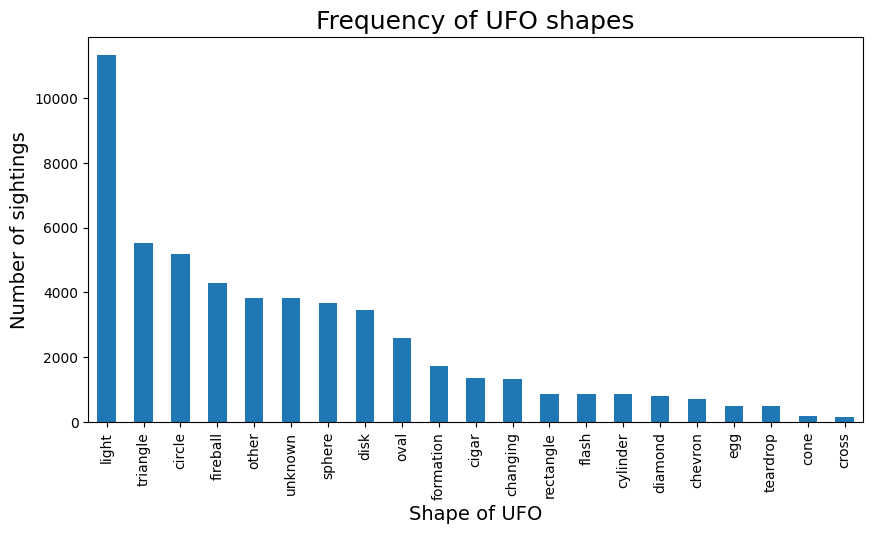

In [7]:
df = del_col_df
UFO_Shape_counts = df["UFO_Shape"].value_counts()
UFO_Shape_counts.plot.bar(figsize=(10,5))
plt.title("Frequency of UFO shapes", fontsize=18);
plt.xlabel("Shape of UFO", fontsize=14);
plt.ylabel("Number of sightings", fontsize=14);

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

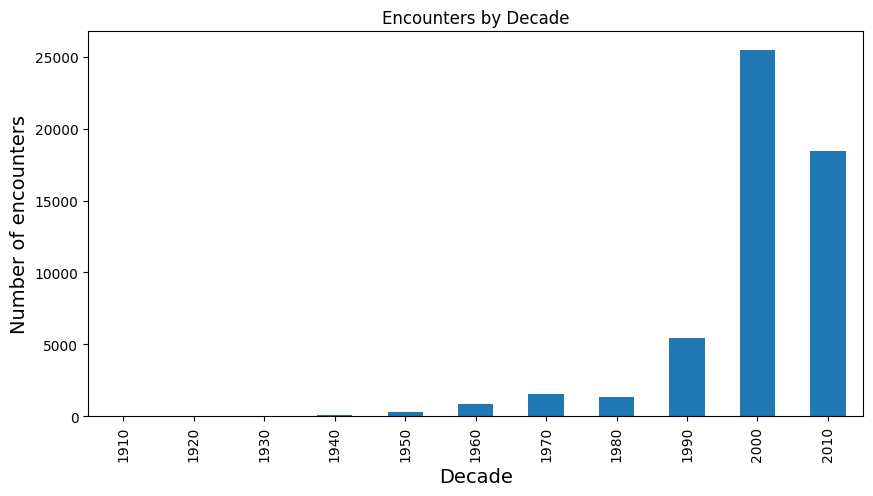

In [8]:
df['year'] = df["Date_Time"].dt.year
df['decade'] = (df['year'] // 10) * 10
df['decade'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title("Encounters by Decade");
plt.xlabel("Decade", fontsize=14);
plt.ylabel("Number of encounters", fontsize=14);



### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

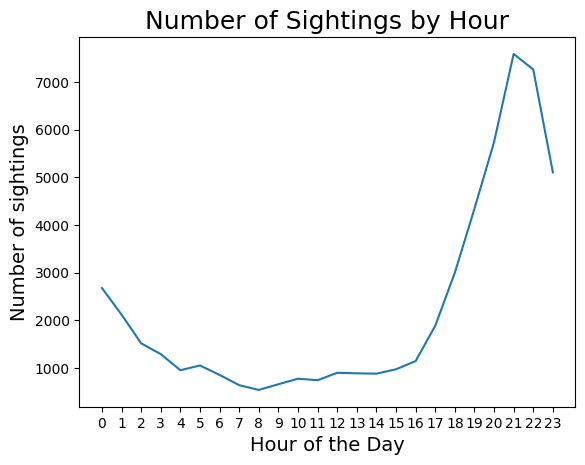

In [9]:
df['hour'] = df['Date_Time'].dt.hour
sightings_by_hour = df['hour'].value_counts().sort_index()
sightings_by_hour.plot.line(x='hour');
plt.title('Number of Sightings by Hour', fontsize=18);
plt.xlabel('Hour of the Day', fontsize=14);
plt.ylabel('Number of sightings', fontsize=14);
plt.xticks(sightings_by_hour.index);



### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * The most common 'shape' of UFO is light. Which of course isn't a shape, so formless luminescence is the most frequently reported shape.

2. Which shape is least frequently reported?
    * Of the reported shapes, the least frequently reported is a cross. Which makes sense to me, as a cross would not be very aerodynamic in flight.

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * There is a peak of sightings at 9PM, and it remains very high until midnight.

4. Are there other factors that may account for this pattern in the data?
    * The biggest factor that pops out to me is that the most common 'Shape' is light. which would only be visible in the dark. Another factor could be that more people are inebriated in those hours, so there could be more false positives in our sightings.

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * There has been quite a consistent increase in the number of sightings over the decades. This is obviously because the human race is nearing a higher state of consciousness, so all of the aliens are keeping a close eye on us to make sure that we evolve in a way that isn't detrimental to the universe.......or everyone has a high definition camera and mass media device in their pocket, so they are much more comfortable reporting a UFO sighting

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * If you desire to see a UFO: Go outside between the hours of 9pm and midnight, go to a place where there is very little light polution, look up and keep your eyes open for a light that isn't a star, plane, or sattelite. As long as you can't identify what it is, you have found an unidentified flying object.


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

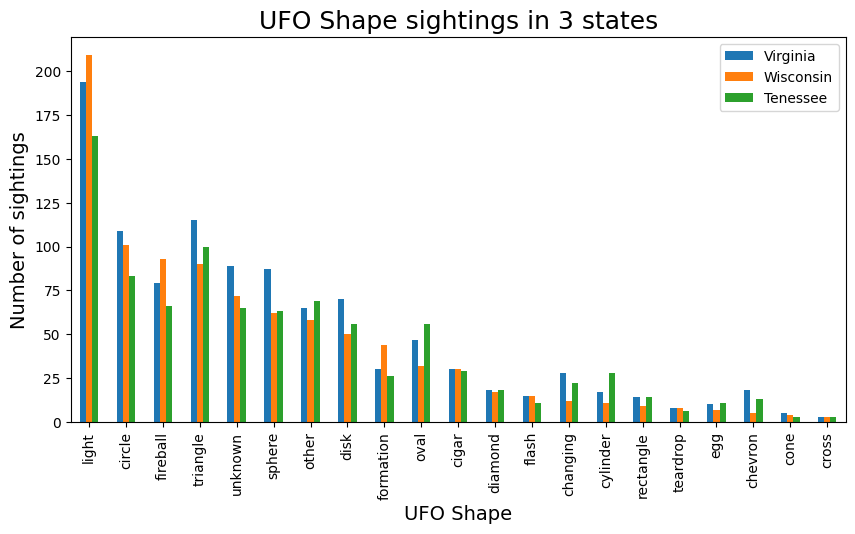

In [10]:
virginia_shapes_count = df[df['State/Province'] == 'VA']['UFO_Shape'].value_counts()
wisconsin_shapes_count = df[df['State/Province'] == 'WI']['UFO_Shape'].value_counts()
Tenessee_shapes_count = df[df['State/Province'] == 'TN']['UFO_Shape'].value_counts()
new_df = pd.DataFrame({'Virginia': virginia_shapes_count, 'Wisconsin': wisconsin_shapes_count, 'Tenessee': Tenessee_shapes_count})
new_df.sort_values('Wisconsin', ascending=False).plot.bar(figsize=(10,5))
plt.title('UFO Shape sightings in 3 states', fontsize=18);
plt.xlabel('UFO Shape', fontsize=14);
plt.ylabel('Number of sightings', fontsize=14);